In [23]:
#
# copy from https://www.kaggle.com/vfdev5/pil-vs-opencv
#

import PIL
import cv2

import matplotlib.pylab as plt
%matplotlib inline

In [24]:
print(cv2.__version__, cv2.__spec__)
print(cv2.getBuildInformation())

4.0.0 ModuleSpec(name='cv2.cv2', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x7f4ac8d945c0>, origin='/home/taohu/anaconda3/envs/pytorch/lib/python3.6/site-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so')

General configuration for OpenCV 4.0.0 =====================================
  Version control:               4.0.0

  Extra modules:
    Location (extra):            /io/opencv_contrib/modules
    Version control (extra):     4.0.0

  Platform:
    Timestamp:                   2019-01-09T18:07:09Z
    Host:                        Linux 4.4.0-101-generic x86_64
    CMake:                       3.9.0
    CMake generator:             Unix Makefiles
    CMake build tool:            /usr/bin/gmake
    Configuration:               Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX5

In [25]:
PIL.__version__, PIL.__spec__

('5.3.0',
 ModuleSpec(name='PIL', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f4ac8d94160>, origin='/home/taohu/anaconda3/envs/pytorch/lib/python3.6/site-packages/PIL/__init__.py', submodule_search_locations=['/home/taohu/anaconda3/envs/pytorch/lib/python3.6/site-packages/PIL']))

In [26]:
!cat /proc/cpuinfo | egrep "model name"

model name	: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz
model name	: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz
model name	: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz
model name	: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz
model name	: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz
model name	: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz
model name	: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz
model name	: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz


In [34]:
from pathlib import Path

train_path=Path('/home/taohu/Dataset/imagenet/train/n01798484')

In [35]:
print(train_path)

/home/taohu/Dataset/imagenet/train/n01798484


In [36]:
filenames = list(train_path.glob('**/*.JPEG'))
len(filenames)

1300

In [37]:
import numpy as np
from PIL import Image, ImageOps

def stage_1_PIL(filename):
    img_pil = Image.open(filename)
    img_pil = ImageOps.box_blur(img_pil, radius=1)
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    return np.asarray(img_pil)

def stage_1_cv2(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.blur(img, ksize=(3, 3))
    img = cv2.flip(img, flipCode=1)
    return img

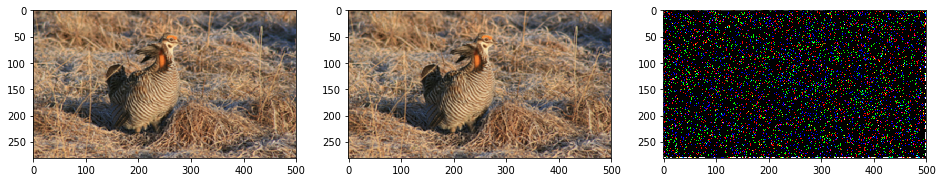

In [39]:
f = str(filenames[0])
r1 = stage_1_PIL(f) 
r2 = stage_1_cv2(f)

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(r1)
plt.subplot(132)
plt.imshow(r2)
plt.subplot(133)
plt.imshow(np.abs(r1 - r2))

In [40]:
%timeit -n5 -r3 [stage_1_PIL(str(f)) for f in filenames[:100]]

1.02 s ± 65.9 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [41]:
%timeit -n5 -r3 [stage_1_cv2(str(f)) for f in filenames[:100]]

466 ms ± 888 µs per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [42]:
def stage_1b_PIL(img_pil):
    img_pil = ImageOps.box_blur(img_pil, radius=1)
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    return np.asarray(img_pil)

def stage_1b_cv2(img):    
    img = cv2.blur(img, ksize=(3, 3))
    img = cv2.flip(img, flipCode=1)
    return img

In [45]:
imgs_PIL = [Image.open(str(f)) for f in filenames[:100]]

In [46]:
def cv2_open(filename):
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imgs_cv2 = [cv2_open(str(f)) for f in filenames[:100]]

In [47]:
%timeit -n5 -r3 [stage_1b_PIL(img_pil) for img_pil in imgs_PIL]

512 ms ± 47.7 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [48]:
%timeit -n5 -r3 [stage_1b_cv2(img) for img in imgs_cv2]

117 ms ± 1.42 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [49]:
import numpy as np
from PIL import Image, ImageOps


def stage_2_PIL(filename):
    img_pil = Image.open(filename)
    img_pil = img_pil.resize((512, 512), Image.CUBIC)
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    img_pil = img_pil.transpose(Image.FLIP_TOP_BOTTOM)
    return np.asarray(img_pil)

def stage_2_cv2(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    img = cv2.resize(img, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
    img = cv2.flip(img, flipCode=1)
    img = cv2.flip(img, flipCode=0)
    return img

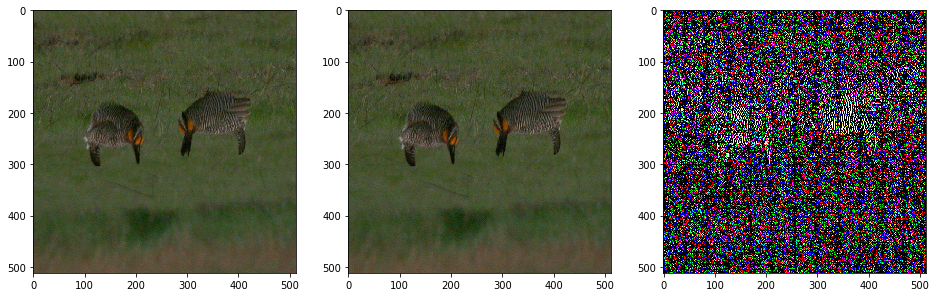

In [51]:
f = filenames[1]
r1 = stage_2_PIL(str(f)) 
r2 = stage_2_cv2(str(f))

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(r1)
plt.subplot(132)
plt.imshow(r2)
plt.subplot(133)
plt.imshow(np.abs(r1 - r2))

In [52]:
%timeit -n5 -r3 [stage_2_PIL(str(f)) for f in filenames[:200]]

1.8 s ± 70.9 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)


In [53]:
%timeit -n5 -r3 [stage_2_cv2(str(f)) for f in filenames[:200]]

894 ms ± 34.5 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
